In [3]:
import data.readers.csv as csv_reader
import transporters.optical_functions_factory as optical_functions_factory
import os
import visualization.optics_parameter_visualisation as optical_function_plotter
import seaborn as sns
from data.parameters_names import ParametersNames as Parameters
from data.grid_configuration import GeometricalCoordinatesGridConfiguration, CanonicalCoordinatesGridConfiguration
from transporters.madx.ptc_twiss.configuration import PtcTwissConfiguration
sns.set_style("whitegrid")

In [16]:
# Parameters of bunch
x_min = 0
x_max = 0
theta_x_min = 140e-6
theta_x_max = 140e-6
y_min = 0
y_max = 0
theta_y_min = 0
theta_y_max = 0
pt_min = -0.15
pt_max = 0

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 12

grid_configuration = GeometricalCoordinatesGridConfiguration.by_boundary(x_min, x_max, number_of_x_values,
                                                        theta_x_min, theta_x_max, number_of_theta_x_values,
                                                        y_min, y_max, number_of_y_values,
                                                        theta_y_min, theta_y_max, number_of_theta_y_values,
                                                        pt_min, pt_max, number_of_pt_values)
particles = grid_configuration.generate_grid()

In [17]:
path_to_xml = "/path/to/configuration_reco_beam1.xml"
approximator_number_in_xml = 2         # Numeration starts from 0!
ptc_twiss_configuration = PtcTwissConfiguration.get_configuration_from_file(path_to_xml, approximator_number_in_xml, 
                                                                            if_filter_by_s=True)

d_x_function = optical_functions_factory.get_d_x(ptc_twiss_configuration)
d_x_from_ptc_twiss = d_x_function(particles)

In [18]:
path_to_csv_file = "/path/to/file.csv"
csv_values = csv_reader.read_in(path_to_csv_file, Parameters.PT, Parameters.D_X)
csv_values.particles.T[1] /= 100     # Change units

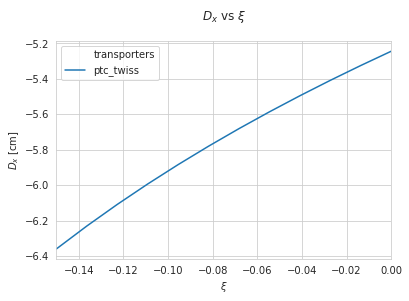

In [19]:
datasets = {
    "ptc_twiss": d_x_from_ptc_twiss,
     "csv": csv_values
}
optical_function_plotter.plot_optical_functions(datasets, Parameters.PT, Parameters.D_X)

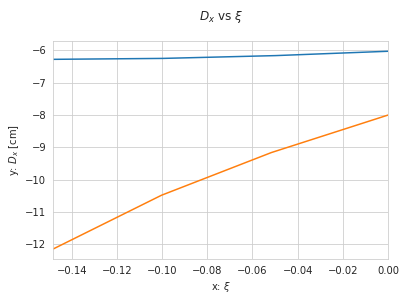

In [15]:
ax = d_x_from_ptc_twiss.plot(Parameters.PT, Parameters.D_X)
csv_values.plot(Parameters.PT, Parameters.D_X, ax=ax)